# Interactive Visualization Lab

Complete the following set of exercises to solidify your knowledge of interactive visualization using Plotly, Cufflinks, and IPyWidgets.

In [51]:
import pandas as pd
#import plotly.plotly as py
import chart_studio as py
import cufflinks as cf
from ipywidgets import interact
import plotly.express as px
cf.go_offline()

In [6]:
from IPython.display import Image

In [7]:
import warnings
warnings.filterwarnings('ignore') # ignorar warnings

In [8]:
retail = pd.read_excel("../data/Online Retail.xlsx")


In [9]:
df=retail

## 1. Create an interactive bar chart showing total quantity and revenue by country (excluding United Kingdom) for the month of April 2011.

In [10]:
data=df[df.Country!='United Kingdom']

data=data.loc[(data.InvoiceDate >= '2011-4-1') & (data.InvoiceDate <= '2011-4-30')]

data = data.groupby('Country').sum()

data = data[['Quantity', 'Revenue']]

data.head()

,Quantity,Revenue
Country,,
Australia,224,421.60
Austria,308,584.78
Belgium,1170,1788.48
Brazil,356,1143.60
Channel Islands,96,243.00


In [ ]:
# I DONT RUN THE PLOTS TO AVOID RUNNING OUT OF MEMORY

### data.iplot(kind='bar', xTitle='Country', title='Cantidad total y beneficio')


## 2. Create an interactive line chart showing quantity and revenue sold to France between January 1st and May 31st 2011.

In [28]:
data=df[df.Country=='France']
data=data.loc[(data.InvoiceDate >= '2011-1-1') & (data.InvoiceDate <= '2011-3-31')]
data = data[["InvoiceDate", 'Quantity', 'Revenue']]
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


data=data.groupby("InvoiceDate").sum()
data.head()


,Quantity,Revenue
InvoiceDate,,
2011-01-05 12:42:00,359,502.07
2011-01-05 14:48:00,369,763.11
2011-01-06 14:26:00,261,283.77
2011-01-06 16:12:00,177,425.25
2011-01-07 12:07:00,488,676.16


In [1]:
# I DONT RUN THE PLOTS TO AVOID RUNNING OUT OF MEMORY

# data.iplot(kind='line', xTitle='France', title='Cantidad total y beneficio')

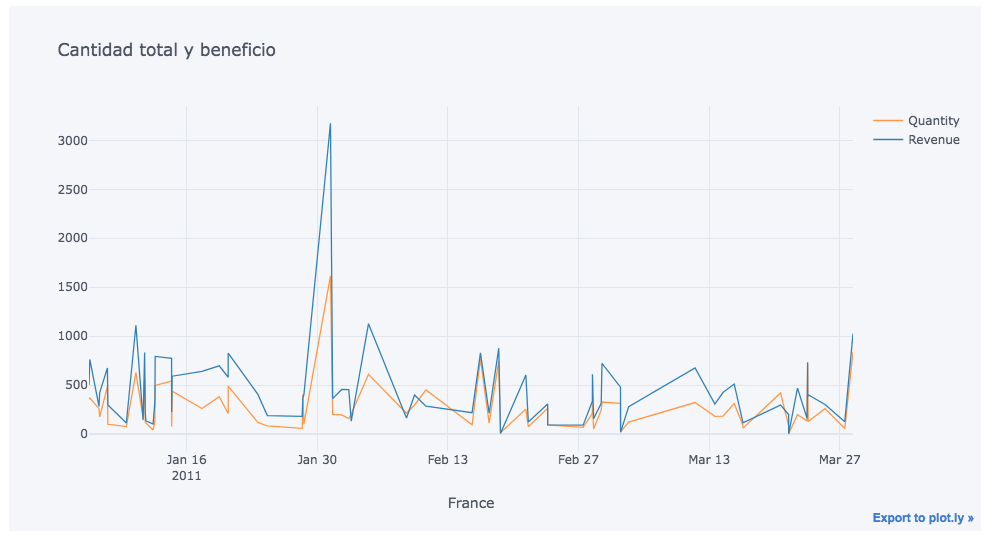

In [ ]:
# media cantidad

data=df.loc[df.Description=='PARTY BUNTING']

data=data.groupby('Country').mean()

data=data[['Quantity', 'UnitPrice']]

data.reset_index(inplace=True)


data.iplot(x='Quantity', 
           y='UnitPrice', 
           categories='Country',
           xTitle='Avg qty', 
           yTitle='Avg unit price',
           color='blue', 
           title='AVG by COuntry')

## 3. Create an interactive scatter plot showing the relationship between average quantity (x-axis) and average unit price (y-axis) for the product PARTY BUNTING with the plot points color-coded by country (categories).

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    20 non-null     object 
 1   Quantity   20 non-null     float64
 2   UnitPrice  20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


In [2]:
# screenshot of the plot available in fig3. I do not run the code to avoid memory issues 

data=df.loc[df.Description=='PARTY BUNTING']
data=data.groupby('Country').mean()
data=data[['Quantity', 'UnitPrice']]

data.reset_index(inplace=True)
data

data.iplot(x='Quantity', 
           y='UnitPrice', 
           categories='Country',
           xTitle='Avg qty', 
           yTitle='Avg unit price',
           #color='blue', 
           title='AVG by COuntry')

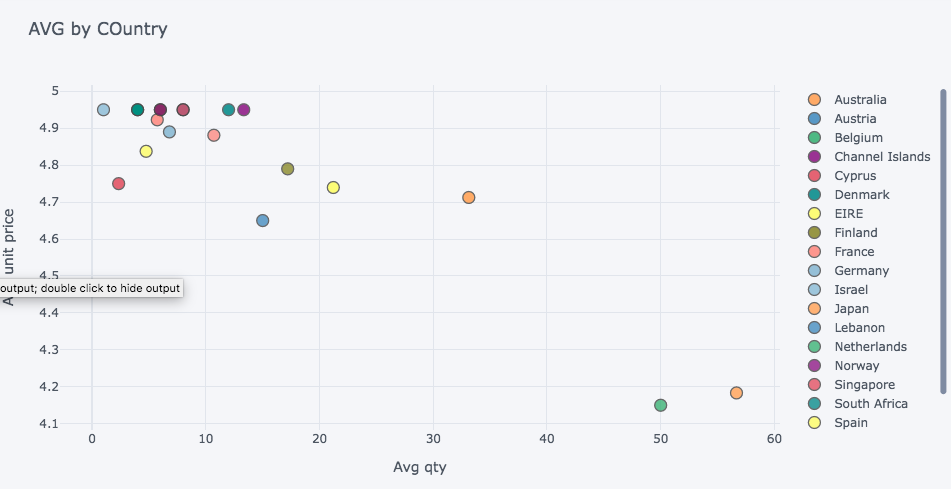

## 4. Create a set of interactive histograms showing the distributions of quantity per invoice for the following countries: EIRE, Germany, France, and Netherlands.

In [26]:

country_lst=['EIRE', 'Germany', 'France']

data=df.copy()

In [ ]:
for country in country_lst:
    DDD = data[data.Country == country]
    DDD.groupby("InvoiceNo").agg({"Quantity":"sum"}).iplot(kind='hist', bins = 500, xTitle=country, title='Distributions of quantity per invoice');


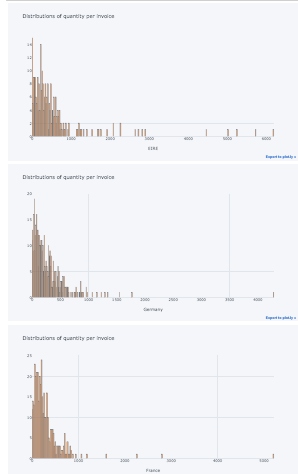

## 5. Create an interactive side-by-side bar chart showing the revenue by country listed below (bars) for each of the products listed below.

In [21]:
product_list = ['JUMBO BAG RED RETROSPOT',
                'CREAM HANGING HEART T-LIGHT HOLDER',
                'REGENCY CAKESTAND 3 TIER']
country_list = ['EIRE', 'Germany', 'France', 'Netherlands']

In [24]:
data=df.copy()

data=data[data["Description"].isin(product_list)]
data=data[data["Country"].isin(country_list)]

data.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country
179,539320,2010-12-16 19:16:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,24,2.95,70.8,14911,EIRE
198,539722,2010-12-21 13:45:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,24,2.95,70.8,14911,EIRE
304,541570,2011-01-19 12:34:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,256,2.55,652.8,14646,Netherlands
322,541979,2011-01-24 14:54:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.95,17.7,14911,EIRE
367,542777,2011-02-01 08:31:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.95,17.7,14911,EIRE


In [ ]:

data=data.pivot_table(values='Revenue', 
                      columns='Description',
                      index='Country', 
                      aggfunc='sum')

data.reset_index(inplace=True)


data.iplot(kind='bar', 
           x='Country', 
           title='Revenue by Country',
           xTitle='Country', 
           yTitle='Revenue')



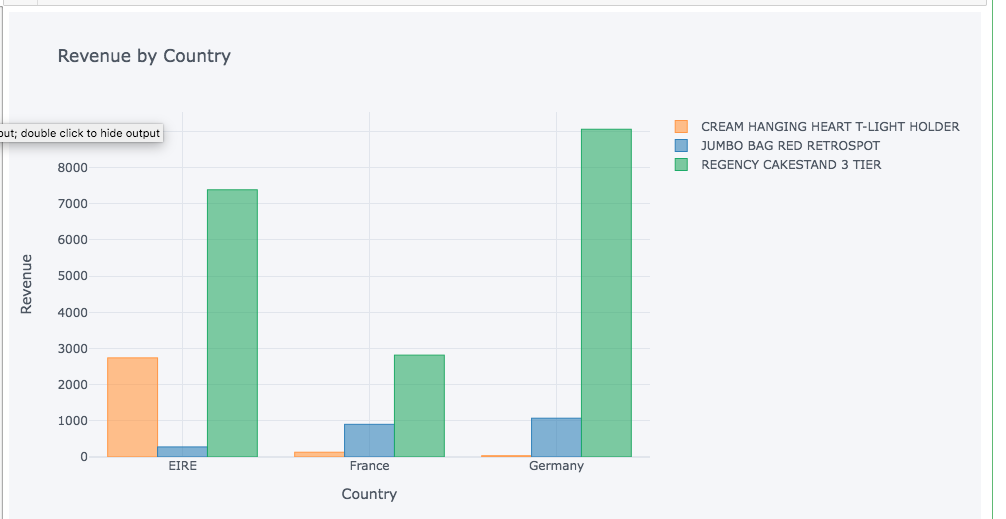

## 6. Create an interactive line chart showing quantity sold by day for the United Kingdom. Add drop-down boxes for Year and Month that allow you to filter the date range that appears in the chart.

In [ ]:
data=df.copy()

data =df[df.Country == "United Kingdom"]

data['day'] = [str(ROW).split(" ")[0] for ROW in data['InvoiceDate']]


myplot = data.groupby("day").agg({"Quantity":"sum"}).iplot(kind='line', xTitle='day', title='byday')



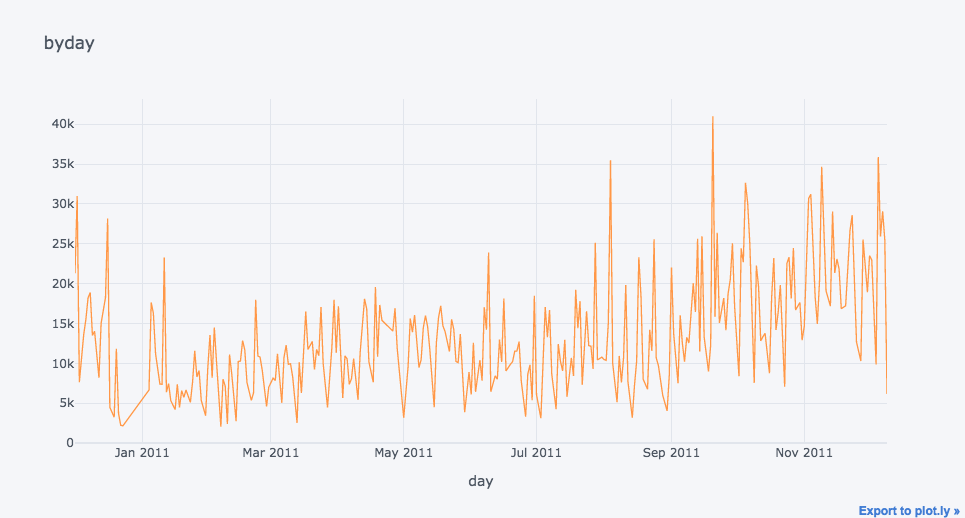

In [40]:
data=df.copy()

data.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
1,536373,2010-12-01 09:02:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
2,536375,2010-12-01 09:32:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
3,536390,2010-12-01 10:19:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,64,2.55,163.2,17511,United Kingdom
4,536394,2010-12-01 10:39:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,32,2.55,81.6,13408,United Kingdom


## 7. Create an interactive scatter plot that plots number of invoices (x-axis) vs. number of customers (y-axis) and the plot points represent individual products. Add two sliders that control the x and y axis ranges.

In [52]:
data=df.copy()

data.head()


pivot_table_result = pd.pivot_table(data, 
                                    index='Description', 
                                    values=['InvoiceNo', 'CustomerID'], 
                                    aggfunc={'InvoiceNo': 'count', 'CustomerID': 'count'})

#pivot_table_result[[""]]
pivot_table_result

,CustomerID,InvoiceNo
Description,,
4 PURPLE FLOCK DINNER CANDLES,39,39
50'S CHRISTMAS GIFT BAG LARGE,111,111
DOLLY GIRL BEAKER,138,138
I LOVE LONDON MINI BACKPACK,71,71
NINE DRAWER OFFICE TIDY,31,31
...,...,...
ZINC T-LIGHT HOLDER STARS SMALL,238,238
ZINC TOP 2 DOOR WOODEN SHELF,9,9
ZINC WILLIE WINKIE CANDLE STICK,192,192


In [63]:

fig=px.scatter(pivot_table_result, 
                 x='InvoiceNo', 
                 y='CustomerID', 
                 title='InvoiceNo vs CustomerID')




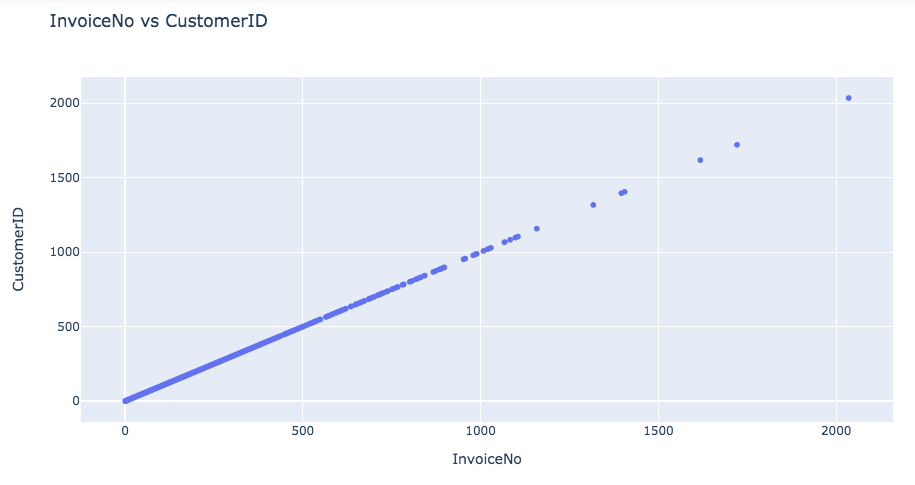

## 8. Creat an interactive bar chart that shows revenue by product description. Add a text field widget that filters the results to show the product that contain the text entered in their description.

In [82]:
data=df.copy()


data2 = pd.pivot_table(data, index='Description',
                      values=['Revenue'],
                      aggfunc={'Revenue': 'sum'})

data2.reset_index(inplace=True, drop=False)

data2

,Description,Revenue
0,4 PURPLE FLOCK DINNER CANDLES,270.76
1,50'S CHRISTMAS GIFT BAG LARGE,2302.25
2,DOLLY GIRL BEAKER,2759.50
3,I LOVE LONDON MINI BACKPACK,1458.15
4,NINE DRAWER OFFICE TIDY,792.85
...,...,...
3635,ZINC T-LIGHT HOLDER STARS SMALL,3879.98
3636,ZINC TOP 2 DOOR WOODEN SHELF,169.50
3637,ZINC WILLIE WINKIE CANDLE STICK,2176.95
3638,ZINC WIRE KITCHEN ORGANISER,156.80


In [ ]:
data2.iplot(kind='bar', 
           x='Description')


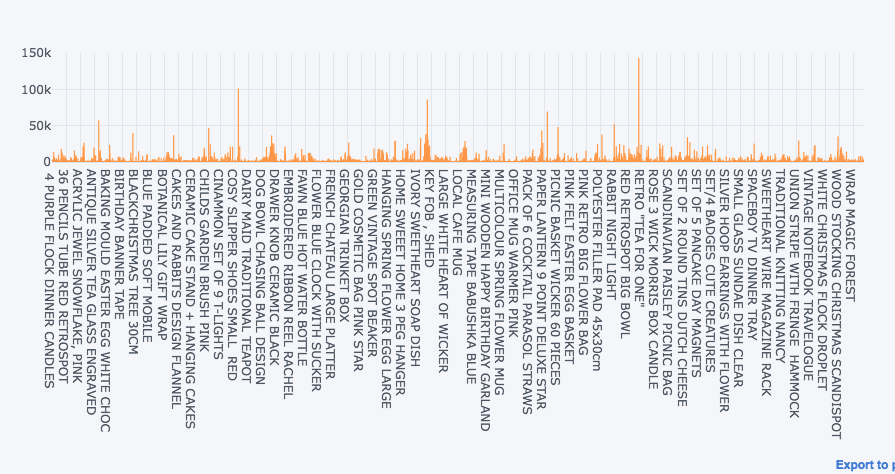